## Capstone 3 Data Wrangling: How People React to Istanbul Convention?

### [Berra Karayel] 


Data set was collected from ERC-funded Politus project (https://ccss.ku.edu.tr/tcss-2023-2__trashed/politus/) which aims to assess the commercial viability of proprietary natural language processing (NLP) and machine learning (ML) technology for AI-based data-driven fair social policymaking.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Istanbul Convention Data Set
ist_söz = pd.read_json('istanbul_sozlesmesi_tweets son.json')
ist_söz.head()

,_id,text,date,senti,ideology_1,ideology_2,welfare,democracy,big5,emotions,author_id,municipal,user_id,user_created_at,user_description,user_name,user_screen_name,user_gender,user_age_group,user_pcode
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,"{'scores': ['0.638', '0.224', '0.137'], 'final...",[],[],[],"[justice_system, human_rights]",[internal_affairs],"[ofke, arzu]",226219898,[],2.262199e+08,2010-12-13 16:42:16,CHP Parti Meclisi Üyesi CHP Kadın Kolları Gene...,Aylin Nazlıaka 🇹🇷,AylinNazliaka,female,>=40,6.0
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,"{'scores': ['0.203', '0.710', '0.085'], 'final...",[liberalism],[],[],[human_rights],[],[],68034431,[],6.803443e+07,2009-08-23 01:13:44,Türkiye Cumhurbaşkanı ve AK Parti Genel Başkan...,Recep Tayyip Erdoğan,RTErdogan,male,>=40,6.0
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,"{'scores': ['0.050', '0.547', '0.402'], 'final...",[],[],[],[human_rights],[],[ofke],181182052,[],1.811821e+08,2010-08-21 14:24:44,Türkiye Değişim Partisi Genel Başkanı @tdp_tur...,Mustafa Sarıgül,M_Sarigul,male,>=40,34.0
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,"{'scores': ['0.803', '0.153', '0.043'], 'final...",[],[],[],[justice_system],[],"[ofke, onaylamama]",1477591849,[],1.477592e+09,2013-06-02 15:36:15,Official Account! Uluslararası İnsani Yardım /...,Gamze Özçelik,Gamze_Ozcelikkk,female,30-39,NaN
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,"{'scores': ['0.563', '0.283', '0.153'], 'final...",[],[feminism],[],[human_rights],[],[onaylamama],184006040,[],1.840060e+08,2010-08-28 12:58:57,İmtihandayız.\nAllah'a Güvenen Mahrum Kalmaz.\...,Sema Maraşlı,Semamarasli,female,19-29,34.0


In [3]:
#size of the data set
ist_söz.shape

(136951, 20)

In [4]:
#columns of the data set
ist_söz.columns

Index(['_id', 'text', 'date', 'senti', 'ideology_1', 'ideology_2', 'welfare',
       'democracy', 'big5', 'emotions', 'author_id', 'municipal', 'user_id',
       'user_created_at', 'user_description', 'user_name', 'user_screen_name',
       'user_gender', 'user_age_group', 'user_pcode'],
      dtype='object')

In [5]:
# data types in our data set
ist_söz.dtypes

_id                          int64
text                        object
date                datetime64[ns]
senti                       object
ideology_1                  object
ideology_2                  object
welfare                     object
democracy                   object
big5                        object
emotions                    object
author_id                    int64
municipal                   object
user_id                    float64
user_created_at             object
user_description            object
user_name                   object
user_screen_name            object
user_gender                 object
user_age_group              object
user_pcode                 float64
dtype: object

In [6]:
#checking the missing values in the data set
ist_söz.isna().sum()

_id                      0
text                     0
date                     0
senti               127215
ideology_1               0
ideology_2               0
welfare                  0
democracy                0
big5                     0
emotions                 0
author_id                0
municipal                0
user_id               5240
user_created_at       5240
user_description      5240
user_name             5240
user_screen_name      5240
user_gender           5316
user_age_group        5316
user_pcode           65697
dtype: int64

In [7]:
#removing unnecessary columns for the analysis
ist_söz.drop(['senti', "author_id", "welfare", "democracy", "big5", "municipal", "user_id", "user_description", "user_name", "user_screen_name", "user_created_at"], axis=1, inplace=True)

In [8]:
#Renaming the columns
ist_söz.rename(columns={"_id":"Tweet ID", "text": "Tweet", "date":"Date",  "ideology_1":"Ideology", "emotions":"Emotions", "user_gender":"User_Gender", "user_age_group":"User_Age_Group", "user_pcode": "User_Location" }, inplace=True)

In [9]:
ist_söz.head()

,Tweet ID,Tweet,Date,Ideology,ideology_2,Emotions,User_Gender,User_Age_Group,User_Location
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,[],[],"[ofke, arzu]",female,>=40,6.0
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,[liberalism],[],[],male,>=40,6.0
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,[],[],[ofke],male,>=40,34.0
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,[],[],"[ofke, onaylamama]",female,30-39,NaN
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,[],[feminism],[onaylamama],female,19-29,34.0


In [10]:
ist_söz['Ideology']= ist_söz['Ideology'].astype(str)
ist_söz['ideology_2']= ist_söz['ideology_2'].astype(str)

In [11]:
ist_söz['Ideology'] = ist_söz['Ideology'].replace("[]", np.nan)
ist_söz['ideology_2'] = ist_söz['ideology_2'].replace("[]", np.nan)

In [12]:
ist_söz.isna().sum()

Tweet ID               0
Tweet                  0
Date                   0
Ideology          123981
ideology_2        116024
Emotions               0
User_Gender         5316
User_Age_Group      5316
User_Location      65697
dtype: int64

In [13]:
# Combining two ideology columns and create a new variable
ist_söz['Ideology_New'] = ist_söz['Ideology'] + ist_söz['ideology_2']

In [14]:
ist_söz.head()

,Tweet ID,Tweet,Date,Ideology,ideology_2,Emotions,User_Gender,User_Age_Group,User_Location,Ideology_New
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,NaN,NaN,"[ofke, arzu]",female,>=40,6.0,NaN
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,['liberalism'],NaN,[],male,>=40,6.0,NaN
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,NaN,NaN,[ofke],male,>=40,34.0,NaN
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,NaN,NaN,"[ofke, onaylamama]",female,30-39,NaN,NaN
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,NaN,['feminism'],[onaylamama],female,19-29,34.0,NaN


In [15]:
# Dropping ideology columns
ist_söz.drop(["Ideology", "ideology_2"],axis=1, inplace=True)

In [16]:
ist_söz.head()

,Tweet ID,Tweet,Date,Emotions,User_Gender,User_Age_Group,User_Location,Ideology_New
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,"[ofke, arzu]",female,>=40,6.0,NaN
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,[],male,>=40,6.0,NaN
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,[ofke],male,>=40,34.0,NaN
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,"[ofke, onaylamama]",female,30-39,NaN,NaN
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,[onaylamama],female,19-29,34.0,NaN


In [17]:
#Renaming newly created ideology columns
ist_söz.rename(columns={"Ideology_New":"Ideology"}, inplace=True)

In [18]:
ist_söz.head()

,Tweet ID,Tweet,Date,Emotions,User_Gender,User_Age_Group,User_Location,Ideology
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,"[ofke, arzu]",female,>=40,6.0,NaN
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,[],male,>=40,6.0,NaN
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,[ofke],male,>=40,34.0,NaN
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,"[ofke, onaylamama]",female,30-39,NaN,NaN
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,[onaylamama],female,19-29,34.0,NaN


In [19]:
ist_söz.columns

Index(['Tweet ID', 'Tweet', 'Date', 'Emotions', 'User_Gender',
       'User_Age_Group', 'User_Location', 'Ideology'],
      dtype='object')

In [20]:
#Loading Turkey Cities and corresponding Licence Plate Code data set
city_pcode = pd.read_excel("pcode.xlsx")
city_pcode.head()

,İl,Plaka Kodu
0,Adana,1
1,Adıyaman,2
2,Afyon,3
3,Ağrı,4
4,Amasya,5


In [21]:
#changing the licence plate code in ist söz data set with corresponding city names
plate_code_to_city = dict(zip(city_pcode['Plaka Kodu'], city_pcode['İl']))

# Map plate codes in the first dataset to city names
ist_söz['User_Location'] = ist_söz['User_Location'].map(plate_code_to_city)

In [22]:
ist_söz.head()

,Tweet ID,Tweet,Date,Emotions,User_Gender,User_Age_Group,User_Location,Ideology
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,"[ofke, arzu]",female,>=40,Ankara,NaN
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,[],male,>=40,Ankara,NaN
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,[ofke],male,>=40,İstanbul,NaN
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,"[ofke, onaylamama]",female,30-39,NaN,NaN
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,[onaylamama],female,19-29,İstanbul,NaN


In [23]:
ist_söz.isna().sum()

Tweet ID               0
Tweet                  0
Date                   0
Emotions               0
User_Gender         5316
User_Age_Group      5316
User_Location      65697
Ideology          131374
dtype: int64

#### Summary Statistics

In [24]:
ist_söz["User_Gender"].value_counts(normalize=True)

User_Gender
male      0.611798
female    0.388202
Name: proportion, dtype: float64

In [25]:
ist_söz["Ideology"].value_counts(normalize=True)

Ideology
['liberalism']['feminism']                                                                            0.818540
['liberalism']['social_democracy']                                                                    0.042855
['kemalism']['feminism']                                                                              0.041958
['turkish_nationalism', 'kemalism']['feminism']                                                       0.024207
['liberalism']['secularism']                                                                          0.012552
['turkish_nationalism']['feminism']                                                                   0.010041
['islamism']['feminism']                                                                              0.007531
['liberalism']['kurdish_national_movement']                                                           0.005379
['liberalism']['environmentalism']                                                                    0

#### Data Visualization

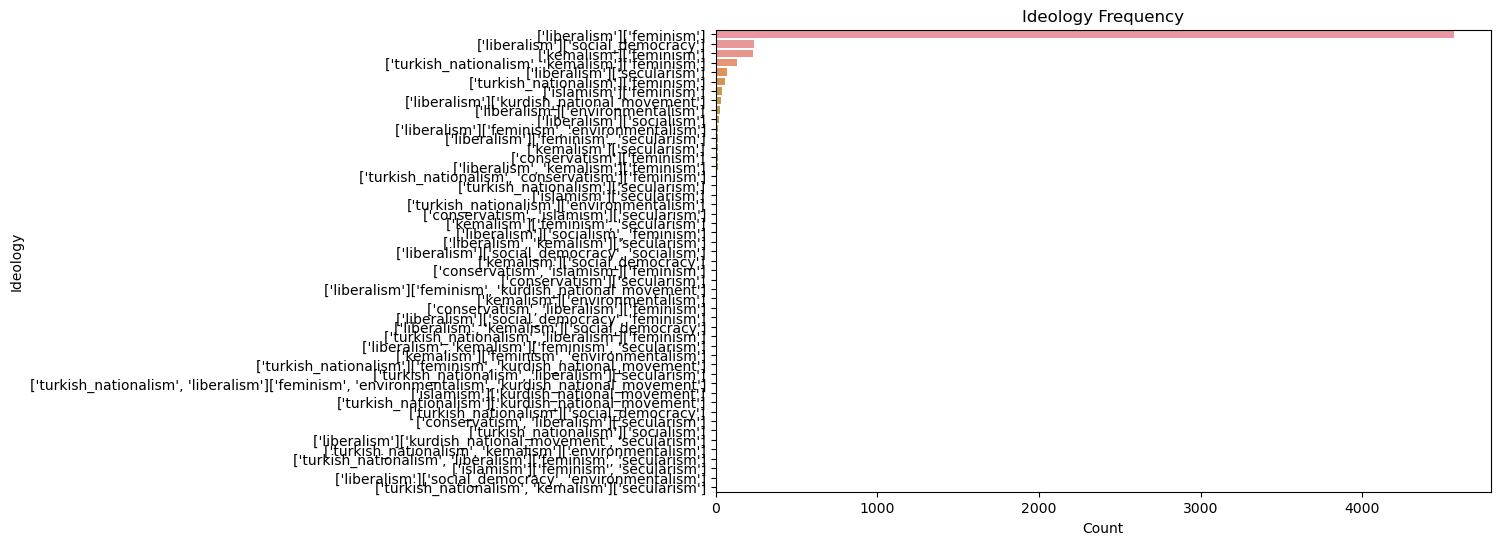

In [26]:
#Ideology Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=ist_söz.explode('Ideology'), y='Ideology', order=ist_söz['Ideology'].explode().value_counts().index)
plt.title('Ideology Frequency')
plt.xlabel('Count')
plt.ylabel('Ideology')
plt.show()

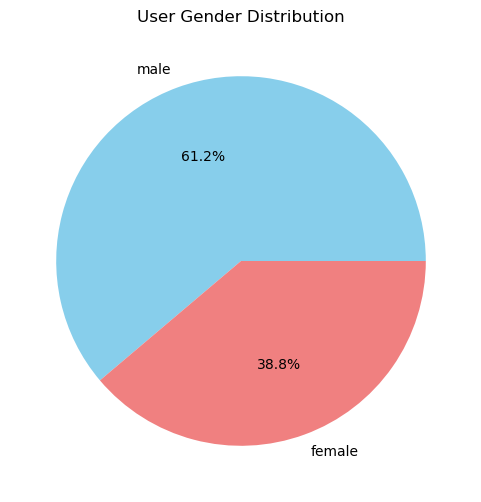

In [27]:
#User Gender Distrubiton
plt.figure(figsize=(6, 6))
ist_söz['User_Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('User Gender Distribution')
plt.ylabel('')
plt.show()

In [28]:
ist_söz.dtypes

Tweet ID                   int64
Tweet                     object
Date              datetime64[ns]
Emotions                  object
User_Gender               object
User_Age_Group            object
User_Location             object
Ideology                  object
dtype: object

In [29]:
ist_söz["User_Age_Group"].unique()

array(['>=40', '30-39', '19-29', '<=18', nan, None], dtype=object)

In [30]:
# Define a mapping dictionary for age groups
age_group_mapping = {
    '<=18': 1,
    '19-29': 2,
    '30-39': 3,
    '>=40': 4,
    'Unknown': 5
}

# Map age groups to numerical values
ist_söz['User_Age_Group'] = ist_söz['User_Age_Group'].map(age_group_mapping)

In [31]:
ist_söz.head()

,Tweet ID,Tweet,Date,Emotions,User_Gender,User_Age_Group,User_Location,Ideology
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,"[ofke, arzu]",female,4.0,Ankara,NaN
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,[],male,4.0,Ankara,NaN
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,[ofke],male,4.0,İstanbul,NaN
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,"[ofke, onaylamama]",female,3.0,NaN,NaN
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,[onaylamama],female,2.0,İstanbul,NaN


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

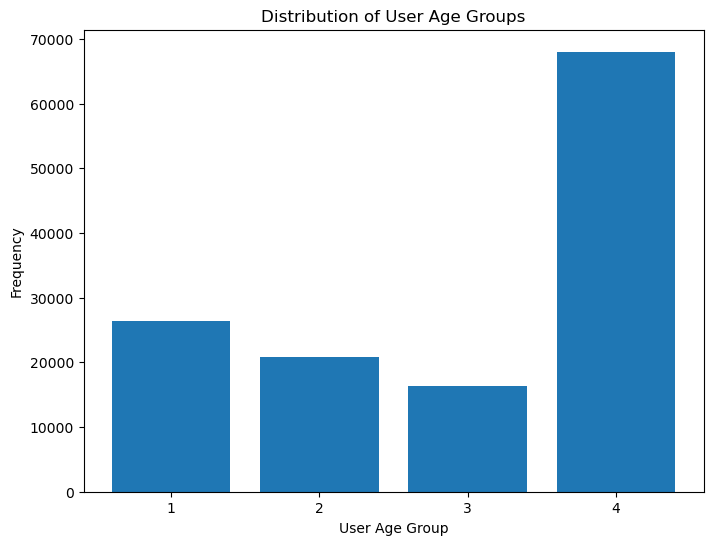

In [32]:
#User Age Group
plt.figure(figsize=(8, 6))
plt.hist(ist_söz['User_Age_Group'], bins=range(1, 6), align='left', rwidth=0.8)
plt.xlabel('User Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of User Age Groups')
plt.xticks(range(1, 5), ['<=18', '19-29', '30-39', '>=40', 'Unknown'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

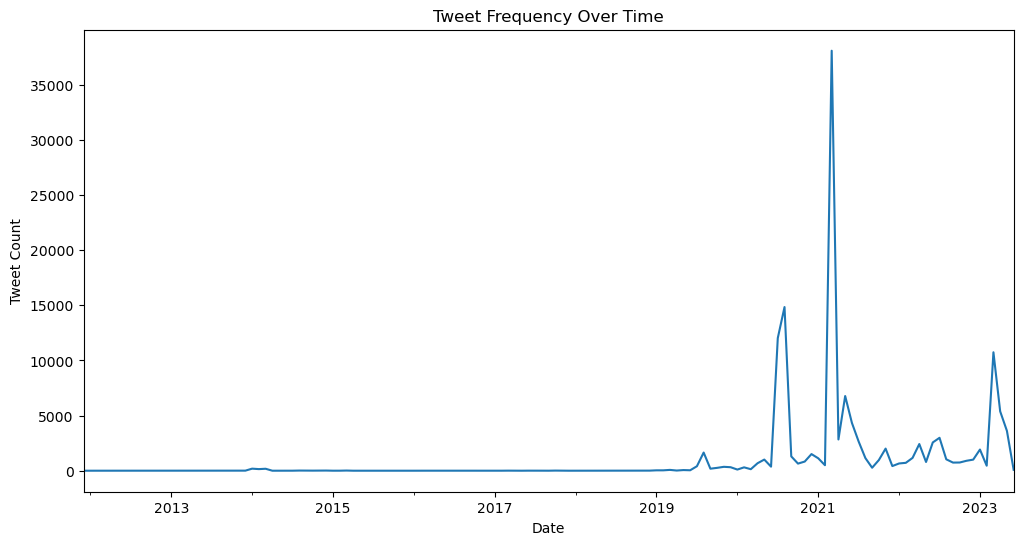

In [33]:
plt.figure(figsize=(12, 6))
ist_söz['Date'] = pd.to_datetime(ist_söz['Date'])
tweet_freq = ist_söz.resample('M', on='Date').size()
tweet_freq.plot()
plt.title('Tweet Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.show()

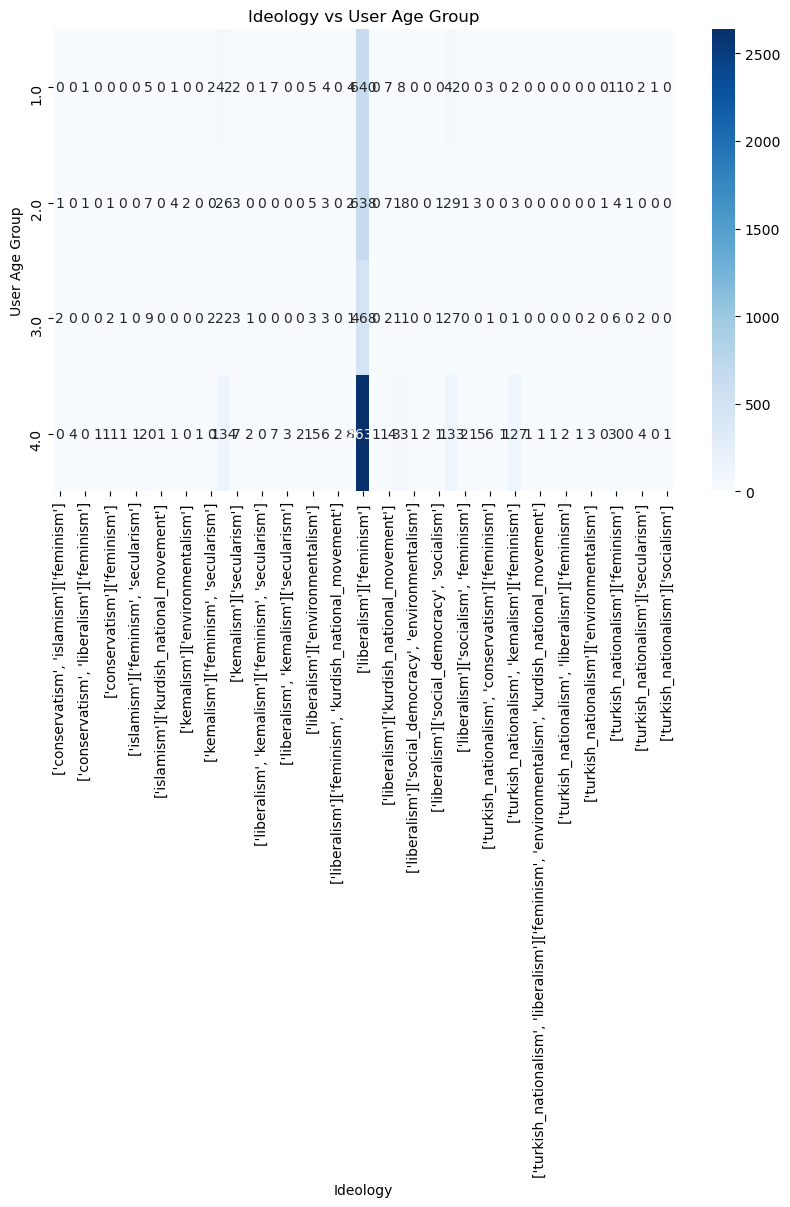

In [34]:
ideology_age_group = ist_söz.groupby(['User_Age_Group', 'Ideology']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(ideology_age_group, cmap='Blues', annot=True, fmt='d')
plt.title('Ideology vs User Age Group')
plt.xlabel('Ideology')
plt.ylabel('User Age Group')
plt.show()

In [35]:
# Create dummy variables for 'User_Gender' column
dummy_gender = pd.get_dummies(ist_söz['User_Gender'], prefix='Gender')

# Concatenate the original dataset with the dummy variables
ist_söz = pd.concat([ist_söz, dummy_gender], axis=1)

# Display the updated dataset with dummy variables
ist_söz.head()

,Tweet ID,Tweet,Date,Emotions,User_Gender,User_Age_Group,User_Location,Ideology,Gender_female,Gender_male
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,"[ofke, arzu]",female,4.0,Ankara,NaN,True,False
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,[],male,4.0,Ankara,NaN,False,True
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,[ofke],male,4.0,İstanbul,NaN,False,True
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,"[ofke, onaylamama]",female,3.0,NaN,NaN,True,False
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,[onaylamama],female,2.0,İstanbul,NaN,True,False


In [37]:
ist_söz.dtypes

Tweet ID                   int64
Tweet                     object
Date              datetime64[ns]
Emotions                  object
User_Gender               object
User_Age_Group           float64
User_Location             object
Ideology                  object
Gender_female               bool
Gender_male                 bool
dtype: object

In [38]:
ist_söz['Gender_female'] = ist_söz['Gender_female'].astype(int)
ist_söz['Gender_male'] = ist_söz['Gender_male'].astype(int)

In [39]:
ist_söz.head()

,Tweet ID,Tweet,Date,Emotions,User_Gender,User_Age_Group,User_Location,Ideology,Gender_female,Gender_male
0,1294293968293892096,Duygu da Şule gibi Rabia Naz gibi düşmedi; kat...,2020-08-14 15:25:03,"[ofke, arzu]",female,4.0,Ankara,NaN,1,0
1,1382321491023380480,"#KütüphaneSöyleşileri'nde bir kardeşimiz, İsta...",2021-04-14 13:15:00,[],male,4.0,Ankara,NaN,0,1
2,1463858615043903488,Kadın erkek eşittir.\nİstanbul Sözleşmesi yaşa...,2021-11-25 13:14:25,[ofke],male,4.0,İstanbul,NaN,0,1
3,1376621758128734208,İstanbul Sözleşmesi ile ilgili hiç bir mecrada...,2021-03-29 19:46:18,"[ofke, onaylamama]",female,3.0,NaN,NaN,1,0
4,1287432020591890432,Mıddafa İsamoğlu' de İstanbul Sözleşmesini sav...,2020-07-26 16:58:07,[onaylamama],female,2.0,İstanbul,NaN,1,0


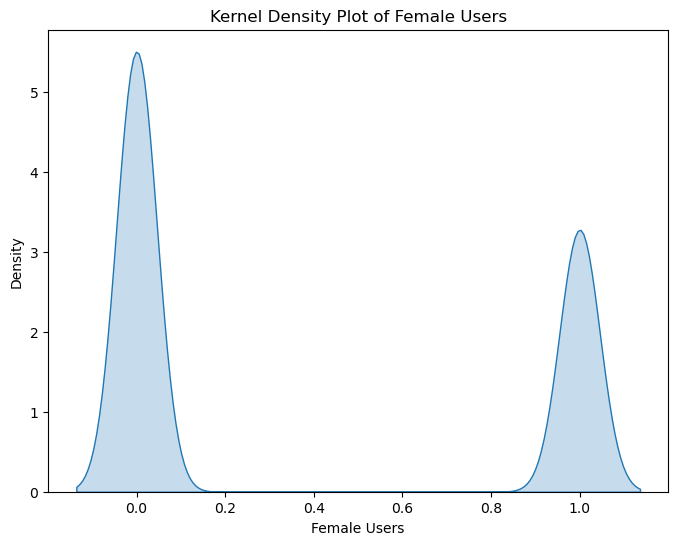

In [42]:
plt.figure(figsize=(8, 6))
sns.kdeplot(ist_söz['Gender_female'], shade=True)
plt.title('Kernel Density Plot of Female Users')
plt.xlabel('Female Users')
plt.ylabel('Density')
plt.show()

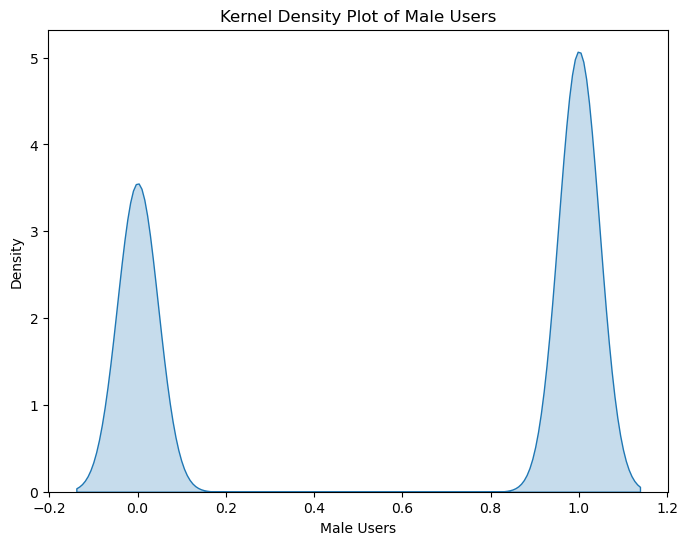

In [43]:
plt.figure(figsize=(8, 6))
sns.kdeplot(ist_söz['Gender_male'], shade=True)
plt.title('Kernel Density Plot of Male Users')
plt.xlabel('Male Users')
plt.ylabel('Density')
plt.show()

In [45]:
ist_söz.to_csv('ist_söz_cleaned.csv')